### 統計學習與深度學習
### Homework 5

請將IPYNB檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

這個作業將要練習影像分類的問題。影像分類是CNN模型的強項，我們的任務是區分照片中主角穿的上衣類型。這個問題在不同的情境下有不同的難度。在`Dive into Deep Learning`中有類似的問題，但是處理較"乾淨"的影像。這次作業的資料來自街拍影像，因此分類的困難度較高。

我們這次作業的任務，是依照照片中人物的上衣，區分以下類別:
* blazer
* cardigan
* coat
* jacket

下面列出這四個類別的範例訓練資料。

Label =  blazer


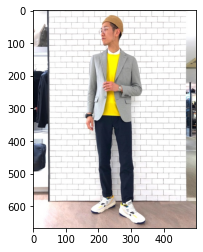

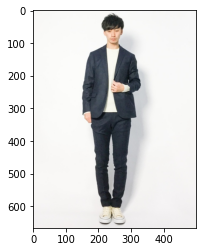

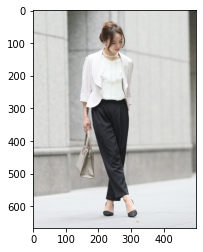

Label =  cardigan


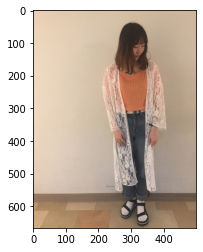

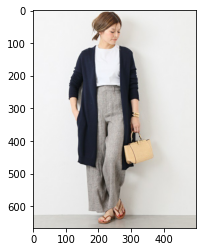

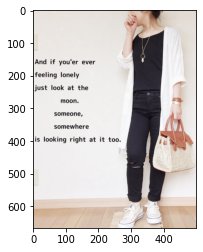

Label =  coat


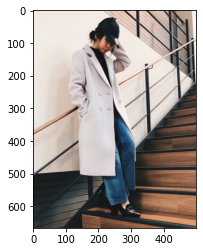

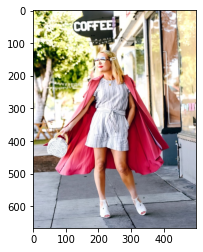

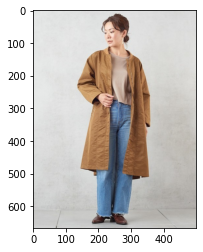

Label =  jacket


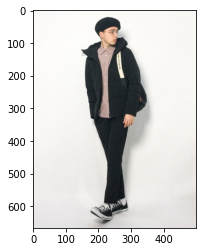

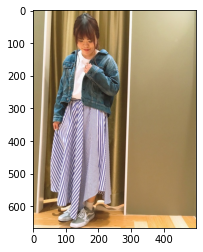

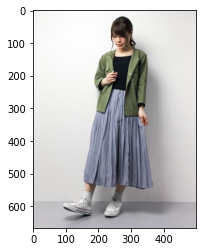

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import random

random.seed(1223)
labels = ['blazer', 'cardigan', 'coat', 'jacket']
for i in range(4):
    print("Label = ", labels[i])
    basepath = os.path.join("photos/train", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    for afn in random.choices(cand_fn, k = 3):    
        img = Image.open(afn)
        plt.imshow(img)
        plt.show()

### 資料
資料在`photos`資料夾。已經區分好訓練(train)、校正(valid)、測試(test)資料。下一層則是依照圖片的標籤分資料夾存放，因此有四個資料夾，分別是blazer, cardigan, coat, jacket。一張圖片只會屬於一個類別。

### Q1
(5%) 列出train, valid, test的總照片數，以及各類別的照片數與比率。在還沒進行模型訓練與評估前，你認為各類別相對的準確率的大小關係為何?

### Q2
(35%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。使用train資料訓練模型，以valid資料決定Early Stopping的Epoch。Early Stopping的Patient參數設為20 Epochs。Batch size設為32。每一個Epoch計算一次Valid Loss，並記錄Valid Loss最低的模型。模型訓練最多200個Epochs。使用最佳模型在test資料計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的Valid Loss。

由於圖片的解析度較高，模型訓練前須將解析度調整(Resize)成較短邊為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。
測試資料(Valid and Test)亦須先將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

得到Per-Class Accuracy之後，請討論與Q1預期的差異與可能原因。

提示: 
* Pytorch Resnet pretrained model的說明請見 <https://pytorch.org/hub/pytorch_vision_resnet/>
* 本題的Test Accuracy應高於78%。

### Q3
(30%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。模型訓練時固定除了最後一層以外的其他權重。也就是說，模型訓練只會調整最後一層Fully Connected Layer。圖片前處理與前題一致。

使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

### Q4
(20%) 使用Resnet50建構圖片分類模型。將最後一層的fully connected layer輸出維度改成4以符合本題任務需求。圖片前處理與前題一致。不使用預訓練權重初始化模型。使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

### Q5
(10%) 統整併討論Q2-Q4的預測能力。說明你的觀察。

### Q1
(5%) 列出train, valid, test的總照片數，以及各類別的照片數與比率。在還沒進行模型訓練與評估前，你認為各類別相對的準確率的大小關係為何?



In [7]:
import os
import pandas as pd
import numpy as np
phases = ['train', 'valid', 'test']
labels = ['blazer', 'cardigan', 'coat', 'jacket']
photo_info = []
for i in phases:
    photo_amount = []
    total=0
    for l in labels:
        c = len(os.listdir(os.path.join('./photos',i,l)))
        photo_amount.append(c)
        total+=c
    photo_amount = ['{}({:.4f}%)'.format(n,n*100/total) for n in photo_amount] + [total]
    photo_info.append(photo_amount)
labels.append('total')
dataset_info= pd.DataFrame(data=photo_info, index=phases, columns=labels)
dataset_info=pd.DataFrame.transpose(dataset_info)

In [8]:
dataset_info

,train,valid,test
blazer,98(9.3780%),7(6.6667%),9(6.1644%)
cardigan,238(22.7751%),36(34.2857%),42(28.7671%)
coat,297(28.4211%),27(25.7143%),43(29.4521%)
jacket,412(39.4258%),35(33.3333%),52(35.6164%)
total,1045,105,146


在 training data裡的照片數量大小順序為：
* jacket > coat > cardigan > blazer

我們可以假設越多的資料通常對於模型訓練越有幫助，也就是說模型對於訓練資料數量多的照片類別，預測時會有比較好的分類能力

我猜測模型的預測準確度高低為：
#### * jacket > coat > cardigan > blazer。


### Q2
(35%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。使用train資料訓練模型，以valid資料決定Early Stopping的Epoch。Early Stopping的Patient參數設為20 Epochs。Batch size設為32。每一個Epoch計算一次Valid Loss，並記錄Valid Loss最低的模型。模型訓練最多200個Epochs。使用最佳模型在test資料計算模型Accuracy, Confuson Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的Valid Loss。

由於圖片的解析度較高，模型訓練前須將解析度調整(Resize)成較短邊為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。
測試資料(Valid and Test)亦須先將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

得到Per-Class Accuracy之後，請討論與Q1預期的差異與可能原因。

提示: 
* Pytorch Resnet pretrained model的說明請見 <https://pytorch.org/hub/pytorch_vision_resnet/>
* 本題的Test Accuracy應高於78%。

In [9]:
import torch as t
from torchvision import datasets, models, transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sys
from typing import List
# data and model path
data_dir = './photos'
model_dir = './models'

# pre define parameter
class_num = 4
batch_size = 32
epoch_num = 200
pretrained = True
resize_size = 256
center_size = 224
rotate = 20
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [10]:
#set gpu
gpu = t.device("cuda:0" if t.cuda.is_available() else "cpu")

In [11]:
class Data_loaders():
    def __init__(self, resize_size: int, center_size: int, rotate: int, mean: List[float], std: List[float], batch_size: int):
        for phase in phases:
            if phase == 'train':
                transform = transforms.Compose([
                    transforms.Resize(resize_size),
                    transforms.RandomCrop(center_size),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomRotation(rotate),
                    transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                ])
            else:
                transform = transforms.Compose([
                    transforms.Resize(resize_size),
                    transforms.CenterCrop(center_size),
                    transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                ])
            data_set = datasets.ImageFolder(os.path.join(data_dir, phase), transform)
            data_loader = t.utils.data.DataLoader(data_set, batch_size=batch_size, shuffle=True, num_workers=8)
            setattr(self, phase, data_loader)
    def get(self, phase: str):
          return getattr(self, phase)

In [12]:
class Resnet50_model:
    def __init__(self, class_num: int, extract: bool, pretrained: bool, gpu) -> None:
        self.model = models.resnet50(pretrained=pretrained)
        if extract:
            for p in self.model.parameters(): p.requires_grad=False
        self.model.fc = t.nn.Linear(self.model.fc.in_features, class_num)
        self.model = self.model.to(gpu)
    def train(self, data_loaders, optim, lr, epoch_num, path):
        min_loss = sys.float_info.max
        best_epoch = 0
        criterion = t.nn.CrossEntropyLoss()
        optimizer = getattr(t.optim, optim)(self.model.parameters(), lr=lr)
        for e in range(epoch_num):
            print('=' * 34)
            print(f'{"Epoch":<10}{e+1:>20}/{epoch_num}')
            for phase in ['train', 'valid']:
                if phase == 'train':
                    self.model.train()
                else:
                    self.model.eval()
                current_loss = 0.0
                current_acc = 0
                for inputs, labels in data_loaders.get(phase):
                    inputs, labels = inputs.to(gpu), labels.to(gpu)
                    optimizer.zero_grad()
                    with t.set_grad_enabled(phase == 'train'):
                        outputs = self.model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = t.max(outputs, 1)
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()
                    current_loss += loss.item() * inputs.size(0)
                    current_acc += t.sum(preds == labels.data)
                data_len = len(data_loaders.get(phase).dataset)
                current_loss = current_loss/data_len
                current_acc = current_acc.double()/data_len
                print(f'- {phase:<7}Loss:{current_loss:>7.3f} Acc:{current_acc:>8.3f}')

                if phase == 'valid' and current_loss < min_loss:
                    best_epoch = e
                    min_loss = current_loss
                elif phase == 'valid' and e == best_epoch + 20:
                    print('='*34)
                    print(f'{"Early Stop":>34}')
                    print(f'Best valid loss:{min_loss:>18.4f}')
                    print('='*34)
                    return min_loss
        print('='*34)
        print(f'Best valid loss:{min_loss:>18.4f}')
        print('='*34)
        return min_loss
    def test(self, data_loaders):
        self.model.eval()
        y_true, y_pred = [], []
        for inputs, labels in data_loaders.get('test'):
            inputs, labels = inputs.to(gpu), labels.to(gpu)
            with t.no_grad():
                outputs = self.model(inputs)
                _, preds = t.max(outputs, 1)
                y_true.extend(labels.tolist())
                y_pred.extend(preds.tolist())

        classes = ['blazer', 'cardigan', 'coat', 'jacket']
        [y_true, y_pred] = list(map(lambda yy: list(map(lambda y: classes[y], yy)), [y_true, y_pred]))

        c_matrix = confusion_matrix(y_true, y_pred, labels=classes)
        c_matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=classes)
        c_matrix_display.plot(cmap=plt.cm.Blues)
        
        accs = c_matrix.diagonal() / c_matrix.sum(axis=1)
        print(f'{"Accuracy":<10}{"-"*10}')
        for i in range(len(classes)):
            print(f'{classes[i]:<10}: {accs[i]:.6f}')
        acc = c_matrix.trace() / c_matrix.sum()
        print(f'{"total":<10}: {acc:.6f}\n\n')
        return acc
    def load(self, path: str):
        self.model = t.load(path)
        return
    def save(self, path):
        t.save(self.model, path)
        return

In [25]:

data_loaders = Data_loaders(resize_size, center_size, rotate, mean, std, batch_size)

path = os.path.join(model_dir, 'Q2_SGD.pickle')
lrs = [0.01,0.001,0.0001]
min_loss = 99999
for lr in lrs:
    model = Resnet50_model(class_num, False, pretrained, gpu)
    print(f'learning ratev={lr}' )
    loss = model.train(data_loaders=data_loaders, optim="SGD", lr=lr, epoch_num=epoch_num, path=path)
    if loss < min_loss:
        min_loss = loss
        model.save(path)

learning ratev=0.01
Epoch                        1/200
- train  Loss:  1.275 Acc:   0.393
- valid  Loss:  1.155 Acc:   0.419
Epoch                        2/200
- train  Loss:  1.114 Acc:   0.517
- valid  Loss:  1.013 Acc:   0.552
Epoch                        3/200
- train  Loss:  0.924 Acc:   0.616
- valid  Loss:  0.864 Acc:   0.648
Epoch                        4/200
- train  Loss:  0.768 Acc:   0.681
- valid  Loss:  0.873 Acc:   0.629
Epoch                        5/200
- train  Loss:  0.656 Acc:   0.749
- valid  Loss:  0.787 Acc:   0.657
Epoch                        6/200
- train  Loss:  0.510 Acc:   0.800
- valid  Loss:  0.756 Acc:   0.733
Epoch                        7/200
- train  Loss:  0.419 Acc:   0.857
- valid  Loss:  0.742 Acc:   0.714
Epoch                        8/200
- train  Loss:  0.387 Acc:   0.847
- valid  Loss:  0.631 Acc:   0.762
Epoch                        9/200
- train  Loss:  0.269 Acc:   0.911
- valid  Loss:  0.645 Acc:   0.762
Epoch                       10/200


### SGD

Accuracy  ----------
blazer    : 0.777778
cardigan  : 0.690476
coat      : 0.813953
jacket    : 0.826923
total     : 0.780822




0.7808219178082192

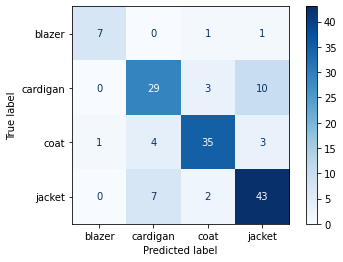

In [26]:

model.load(path)
model.test(data_loaders)

使用SGD，測試多個lr

lr=0.001時，有 Best valid loss=0.5650

而total accuracy有達到0.7808219178082192

In [27]:


data_loaders = Data_loaders(resize_size, center_size, rotate, mean, std, batch_size)

path = os.path.join(model_dir, 'Q2_Adam.pickle')
lrs = [0.001,0.0001,0.00001]
min_loss = 99999
for lr in lrs:
    model = Resnet50_model(class_num, False, pretrained, gpu)
    print(f'learning ratev={lr}' )
    loss = model.train(data_loaders=data_loaders, optim="Adam", lr=lr, epoch_num=epoch_num, path=path)
    if loss < min_loss:
        min_loss = loss
        model.save(path)

learning ratev=0.001
Epoch                        1/200
- train  Loss:  1.383 Acc:   0.370
- valid  Loss:  1.451 Acc:   0.314
Epoch                        2/200
- train  Loss:  1.299 Acc:   0.384
- valid  Loss:  1.262 Acc:   0.438
Epoch                        3/200
- train  Loss:  1.242 Acc:   0.414
- valid  Loss:  1.329 Acc:   0.381
Epoch                        4/200
- train  Loss:  1.206 Acc:   0.424
- valid  Loss:  1.261 Acc:   0.381
Epoch                        5/200
- train  Loss:  1.192 Acc:   0.457
- valid  Loss:  1.315 Acc:   0.400
Epoch                        6/200
- train  Loss:  1.159 Acc:   0.482
- valid  Loss:  1.320 Acc:   0.457
Epoch                        7/200
- train  Loss:  1.157 Acc:   0.489
- valid  Loss:  1.165 Acc:   0.457
Epoch                        8/200
- train  Loss:  1.140 Acc:   0.507
- valid  Loss:  1.278 Acc:   0.457
Epoch                        9/200
- train  Loss:  1.148 Acc:   0.502
- valid  Loss:  1.210 Acc:   0.495
Epoch                       10/200

### Adam

Accuracy  ----------
blazer    : 0.555556
cardigan  : 0.547619
coat      : 0.813953
jacket    : 0.884615
total     : 0.746575




0.7465753424657534

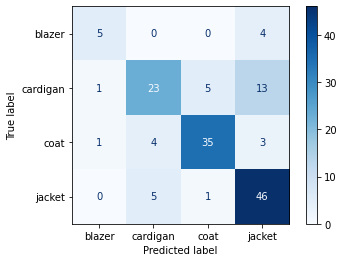

In [28]:

model.load(path)
model.test(data_loaders)


使用Adam，測試多個lr

lr=0.00001時，有Best valid loss=0.5253

而total accuracy有達到0.7465753424657534

#### 總結
最終挑選SGD的模型來討論，可以看出total accuracy有達到0.7808219178082192(過basic line)
##### Accuracy  ----------
* blazer    : 0.777778
* cardigan  : 0.690476
* coat      : 0.813953
* jacket    : 0.826923
* total     : 0.780822


我們預測精準度排序為
* jacket > coat > cardigan > blazer

SGD預測精準度為
* jacket > coat > blazer   > cardigan 

雖然有差，training data最多的jacket、coat確實排名在前兩名

而Adam的預測的基準度跟我們預測的相同。

整體來看，還是可以驗證我們對於training data多得比較會有良好的預測結果。

### Q3
(30%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。模型訓練時固定除了最後一層以外的其他權重。也就是說，模型訓練只會調整最後一層Fully Connected Layer。圖片前處理與前題一致。

使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

In [32]:

data_loaders = Data_loaders(resize_size, center_size, rotate, mean, std, batch_size)

path = os.path.join(model_dir, 'Q3_SGD.pickle')
lrs = [0.01,0.001,0.0001]
min_loss = 99999
for lr in lrs:
    model = Resnet50_model(class_num, True, pretrained, gpu)
    print(f'learning ratev={lr}' )
    loss = model.train(data_loaders=data_loaders, optim="SGD", lr=lr, epoch_num=epoch_num, path=path)
    if loss < min_loss:
        min_loss = loss
        model.save(path)

learning ratev=0.01
Epoch                        1/200
- train  Loss:  1.301 Acc:   0.359
- valid  Loss:  1.298 Acc:   0.362
Epoch                        2/200
- train  Loss:  1.203 Acc:   0.461
- valid  Loss:  1.272 Acc:   0.314
Epoch                        3/200
- train  Loss:  1.159 Acc:   0.473
- valid  Loss:  1.172 Acc:   0.429
Epoch                        4/200
- train  Loss:  1.119 Acc:   0.509
- valid  Loss:  1.175 Acc:   0.467
Epoch                        5/200
- train  Loss:  1.105 Acc:   0.509
- valid  Loss:  1.405 Acc:   0.305
Epoch                        6/200
- train  Loss:  1.122 Acc:   0.508
- valid  Loss:  1.261 Acc:   0.457
Epoch                        7/200
- train  Loss:  1.096 Acc:   0.510
- valid  Loss:  1.037 Acc:   0.505
Epoch                        8/200
- train  Loss:  1.028 Acc:   0.539
- valid  Loss:  1.039 Acc:   0.629
Epoch                        9/200
- train  Loss:  1.011 Acc:   0.554
- valid  Loss:  0.984 Acc:   0.552
Epoch                       10/200


### SGD

Accuracy  ----------
blazer    : 0.444444
cardigan  : 0.476190
coat      : 0.511628
jacket    : 0.788462
total     : 0.595890




0.5958904109589042

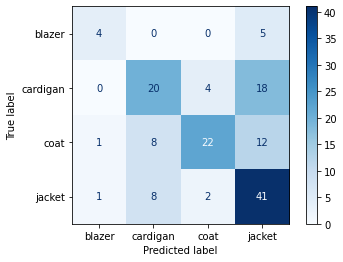

In [33]:
model.load(path)
model.test(data_loaders)

使用SGD，測試多個lr

lr=0.01時，有 Best valid loss=0.9449

而total accuracy有達到0.5958904109589042

In [14]:

data_loaders = Data_loaders(resize_size, center_size, rotate, mean, std, batch_size)

path = os.path.join(model_dir, 'Q3_Adam.pickle')
lrs = [0.001, 0.0001,0.00001]
min_loss = 99999
for lr in lrs:
    model = Resnet50_model(class_num, True, pretrained, gpu)
    print(f'learning ratev={lr}' )
    loss = model.train(data_loaders=data_loaders, optim="Adam", lr=lr, epoch_num=epoch_num, path=path)
    if loss < min_loss:
        min_loss = loss
        model.save(path)

learning ratev=0.001
Epoch                        1/200
- train  Loss:  1.245 Acc:   0.448
- valid  Loss:  1.128 Acc:   0.533
Epoch                        2/200
- train  Loss:  1.138 Acc:   0.510
- valid  Loss:  1.254 Acc:   0.400
Epoch                        3/200
- train  Loss:  1.084 Acc:   0.515
- valid  Loss:  1.035 Acc:   0.533
Epoch                        4/200
- train  Loss:  1.034 Acc:   0.547
- valid  Loss:  1.045 Acc:   0.514
Epoch                        5/200
- train  Loss:  0.987 Acc:   0.583
- valid  Loss:  1.015 Acc:   0.533
Epoch                        6/200
- train  Loss:  0.959 Acc:   0.601
- valid  Loss:  0.979 Acc:   0.571
Epoch                        7/200
- train  Loss:  0.945 Acc:   0.607
- valid  Loss:  0.985 Acc:   0.571
Epoch                        8/200
- train  Loss:  0.969 Acc:   0.581
- valid  Loss:  1.061 Acc:   0.505
Epoch                        9/200
- train  Loss:  0.972 Acc:   0.594
- valid  Loss:  1.020 Acc:   0.571
Epoch                       10/200

### Adam

Accuracy  ----------
blazer    : 0.333333
cardigan  : 0.642857
coat      : 0.534884
jacket    : 0.711538
total     : 0.616438




0.6164383561643836

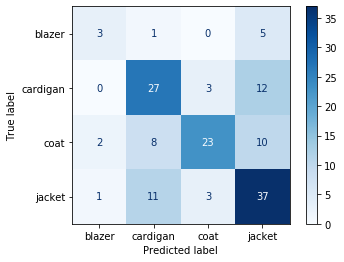

In [15]:
model.load(path)
model.test(data_loaders)

使用Adam，測試多個lr

lr=0.0001時，有 Best valid loss=0.9355

而total accuracy有達到0.6164383561643836

#### 總結
最終挑選Adam的模型來討論，可以看出total accuracy有達到0.6164383561643836
##### Accuracy  ----------
* blazer    : 0.333333
* cardigan  : 0.642857
* coat      : 0.534884
* jacket    : 0.711538
* total     : 0.616438


Adam預測精準度為
* jacket > cardigan  >  coat    > blazer 



### Q4
(20%) 使用Resnet50建構圖片分類模型。將最後一層的fully connected layer輸出維度改成4以符合本題任務需求。圖片前處理與前題一致。不使用預訓練權重初始化模型。使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

In [16]:
pretrained=False
data_loaders = Data_loaders(resize_size, center_size, rotate, mean, std, batch_size)

path = os.path.join(model_dir, 'Q4_SGD.pickle')
lrs = [0.01, 0.001,0.0001]
min_loss = 99999
for lr in lrs:
    model = Resnet50_model(class_num, False, pretrained, gpu)
    print(f'learning ratev={lr}' )
    loss = model.train(data_loaders=data_loaders, optim="SGD", lr=lr, epoch_num=epoch_num, path=path)
    if loss < min_loss:
        min_loss = loss
        model.save(path)

learning ratev=0.01
Epoch                        1/200
- train  Loss:  3.420 Acc:   0.335
- valid  Loss:  1.818 Acc:   0.257
Epoch                        2/200
- train  Loss:  1.928 Acc:   0.311
- valid  Loss:  2.505 Acc:   0.257
Epoch                        3/200
- train  Loss:  1.759 Acc:   0.340
- valid  Loss:  3.058 Acc:   0.333
Epoch                        4/200
- train  Loss:  1.688 Acc:   0.335
- valid  Loss:  1.387 Acc:   0.343
Epoch                        5/200
- train  Loss:  1.667 Acc:   0.342
- valid  Loss:  1.374 Acc:   0.352
Epoch                        6/200
- train  Loss:  1.745 Acc:   0.347
- valid  Loss:  2.171 Acc:   0.333
Epoch                        7/200
- train  Loss:  1.697 Acc:   0.343
- valid  Loss:  2.592 Acc:   0.333
Epoch                        8/200
- train  Loss:  1.596 Acc:   0.350
- valid  Loss:  1.310 Acc:   0.371
Epoch                        9/200
- train  Loss:  1.491 Acc:   0.356
- valid  Loss:  1.656 Acc:   0.238
Epoch                       10/200


### SGD

Accuracy  ----------
blazer    : 0.000000
cardigan  : 0.452381
coat      : 0.023256
jacket    : 0.826923
total     : 0.431507




0.4315068493150685

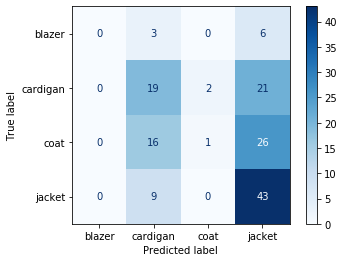

In [17]:
model.load(path)
model.test(data_loaders)

使用SGD，測試多個lr

lr=0.01時，有 Best valid loss=1.1876

而total accuracy有達到0.4315068493150685

In [18]:
pretrained=False
data_loaders = Data_loaders(resize_size, center_size, rotate, mean, std, batch_size)

path = os.path.join(model_dir, 'Q4_Adam.pickle')
lrs = [0.001,0.0001,0.00001]
min_loss = 99999
for lr in lrs:
    model = Resnet50_model(class_num, False, pretrained, gpu)
    print(f'learning ratev={lr}' )
    loss = model.train(data_loaders=data_loaders, optim="Adam", lr=lr, epoch_num=epoch_num, path=path)
    if loss < min_loss:
        min_loss = loss
        model.save(path)

learning ratev=0.001
Epoch                        1/200
- train  Loss:  1.800 Acc:   0.325
- valid  Loss:  3.867 Acc:   0.143
Epoch                        2/200
- train  Loss:  1.360 Acc:   0.324
- valid  Loss:  1.724 Acc:   0.324
Epoch                        3/200
- train  Loss:  1.325 Acc:   0.395
- valid  Loss:  1.581 Acc:   0.333
Epoch                        4/200
- train  Loss:  1.302 Acc:   0.401
- valid  Loss:  1.421 Acc:   0.248
Epoch                        5/200
- train  Loss:  1.322 Acc:   0.376
- valid  Loss:  1.386 Acc:   0.457
Epoch                        6/200
- train  Loss:  1.288 Acc:   0.393
- valid  Loss:  1.354 Acc:   0.324
Epoch                        7/200
- train  Loss:  1.262 Acc:   0.391
- valid  Loss:  1.471 Acc:   0.410
Epoch                        8/200
- train  Loss:  1.240 Acc:   0.434
- valid  Loss:  1.550 Acc:   0.324
Epoch                        9/200
- train  Loss:  1.226 Acc:   0.426
- valid  Loss:  1.235 Acc:   0.429
Epoch                       10/200

### Adam

Accuracy  ----------
blazer    : 0.000000
cardigan  : 0.095238
coat      : 0.744186
jacket    : 0.769231
total     : 0.520548




0.5205479452054794

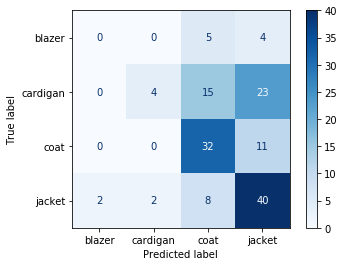

In [19]:
model.load(path)
model.test(data_loaders)

使用Adam，測試多個lr

lr=0.001時，有 Best valid loss=1.1106

而total accuracy有達到0.5205479452054794

#### 總結
最終挑選Adam的模型來討論，可以看出total accuracy有達到0.5205479452054794
##### Accuracy  ----------
* blazer    : 0.000000
* cardigan  : 0.095238
* coat      : 0.744186
* jacket    : 0.769231
* total     : 0.520548

Adam預測精準度為
* jacket > coat  > cardigan   > blazer 

### Q5
(10%) 統整併討論Q2-Q4的預測能力。說明你的觀察。

整體來看，預測的精準度為
* Q2>Q3>Q4
若是per-class來看，預測的精準度為也是以Q2最好，Q3和Q4雖然有些class是Q4好，但其實可以看出還是以Q3略勝一籌，
* Q2>Q3>Q4

ResNet50是相當複雜的模型，我們的資料顯然不夠多，所以有Q2和Q4的差別（pretrain model有無）

pretrain model原本所用的資料跟我們的有所差異，所以有Q2和Q4的差別（第三題模型訓練時固定除了最後一層以外的其他權重）
